### Formos modelis

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import re

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Butai_pardavimui.csv to Butai_pardavimui.csv


In [3]:
data_p=pd.read_csv('Butai_pardavimui.csv', index_col='Unnamed: 0')
df_p=pd.DataFrame(data_p)
df_p=df_p.drop(['Kvadrato kaina'], axis=1)
df_p

#Kadangi butų skelbimuose yra butū bendrabučių tipuose ar skelbimų kurie yra uždeti kaip už nuomos kainą, 
# išmetame butus, kurių kaina yra žemesnė nei 10k.


,Rajonas,Gatve,Kaina,Kambariai,Plotas,Aukstas,Is viso aukstu
0,Lazdynėliai,Bukčių g.,69070,2,40.46,2,5
1,Pašilaičiai,Budiniškių g.,74200,2,46.41,1,5
2,Balsiai,Želmenų g.,99000,4,94.00,1,1
3,Bajorai,Bajorų kel.,108800,4,69.51,2,6
4,Antakalnis,Vytauto Žalakevičiaus g.,155000,2,63.11,3,7
...,...,...,...,...,...,...,...
3199,Naujamiestis,Savanorių pr.,57000,3,56.82,2,5
3200,Senamiestis,Gaono g.,304000,2,115.72,2,3
3201,Naujininkai,Naugarduko g.,15308,1,25.89,1,1
3202,Fabijoniškės,S. Stanevičiaus g.,47787,3,67.00,5,5


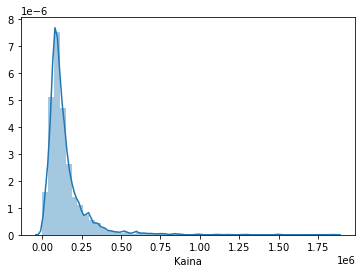

In [4]:
sns.distplot(df_p['Kaina'])

In [5]:
df_p=df_p.loc[df_p['Kaina']<350000]
df_p=df_p.loc[df_p['Kaina']>15000]
df_p

,Rajonas,Gatve,Kaina,Kambariai,Plotas,Aukstas,Is viso aukstu
0,Lazdynėliai,Bukčių g.,69070,2,40.46,2,5
1,Pašilaičiai,Budiniškių g.,74200,2,46.41,1,5
2,Balsiai,Želmenų g.,99000,4,94.00,1,1
3,Bajorai,Bajorų kel.,108800,4,69.51,2,6
4,Antakalnis,Vytauto Žalakevičiaus g.,155000,2,63.11,3,7
...,...,...,...,...,...,...,...
3199,Naujamiestis,Savanorių pr.,57000,3,56.82,2,5
3200,Senamiestis,Gaono g.,304000,2,115.72,2,3
3201,Naujininkai,Naugarduko g.,15308,1,25.89,1,1
3202,Fabijoniškės,S. Stanevičiaus g.,47787,3,67.00,5,5


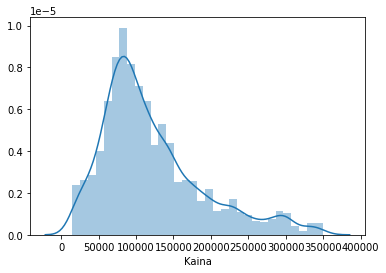

In [6]:
sns.distplot(df_p['Kaina'])

In [7]:
mean = df_p['Kaina'].mean()
std = df_p['Kaina'].std()
df_p = df_p.loc[(mean - 3*std <= df_p['Kaina']) & (df_p['Kaina'] <= mean + 3*std)]
df_p

,Rajonas,Gatve,Kaina,Kambariai,Plotas,Aukstas,Is viso aukstu
0,Lazdynėliai,Bukčių g.,69070,2,40.46,2,5
1,Pašilaičiai,Budiniškių g.,74200,2,46.41,1,5
2,Balsiai,Želmenų g.,99000,4,94.00,1,1
3,Bajorai,Bajorų kel.,108800,4,69.51,2,6
4,Antakalnis,Vytauto Žalakevičiaus g.,155000,2,63.11,3,7
...,...,...,...,...,...,...,...
3199,Naujamiestis,Savanorių pr.,57000,3,56.82,2,5
3200,Senamiestis,Gaono g.,304000,2,115.72,2,3
3201,Naujininkai,Naugarduko g.,15308,1,25.89,1,1
3202,Fabijoniškės,S. Stanevičiaus g.,47787,3,67.00,5,5


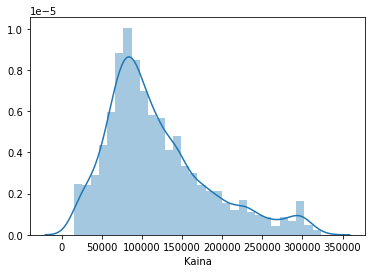

In [0]:
sns.distplot(df_p['Kaina'])

In [0]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [0]:
df_p=pd.get_dummies(df_p, columns=['Rajonas'])

In [0]:
x=df_p.drop(['Kaina','Gatve'], axis=1)
y=df_p['Kaina']
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=33)

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
lin_reg = LinearRegression()

scores = cross_val_score(lin_reg, x_train, y_train,
                        scoring="neg_mean_squared_error", cv=10)

# find root mean squared error, scores is an array of negative numbers
rmse_scores = np.sqrt(-scores)

print("Mean:\t\t ", rmse_scores.mean(), "\nStandard Deviation:", rmse_scores.std())

Mean:		  35548.22257785719 
Standard Deviation: 3597.85749757309


In [12]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
tree_reg = DecisionTreeRegressor()
scores = cross_val_score(tree_reg, x_train, y_train,
                        scoring="neg_mean_squared_error", cv=10)

# find root mean squared error
rmse_scores = np.sqrt(-scores)

print("Mean:\t\t ", rmse_scores.mean(), "\nStandard Deviation:", rmse_scores.std())

Mean:		  39847.27700365931 
Standard Deviation: 2763.7738911935153


In [13]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(x_train, y_train)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
forest_scores = cross_val_score(forest_reg, x_train, y_train,
                               scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
print("Mean:\t\t ", forest_rmse_scores.mean(), "\nStandard Deviation:", forest_rmse_scores.std())

Mean:		  30969.52145382703 
Standard Deviation: 2720.9962234393747


In [14]:
from sklearn.model_selection import GridSearchCV
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                          scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [15]:
cvres = grid_search.cv_results_
print("{}\t\t {}\n".format('Mean Score','Parameters'))
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    x = np.sqrt(-mean_score)
    y = params
    print("{:.2f}\t {}".format(x, y))

Mean Score		 Parameters

36983.95	 {'max_features': 2, 'n_estimators': 3}
32340.44	 {'max_features': 2, 'n_estimators': 10}
31195.52	 {'max_features': 2, 'n_estimators': 30}
34909.05	 {'max_features': 4, 'n_estimators': 3}
32042.04	 {'max_features': 4, 'n_estimators': 10}
30607.53	 {'max_features': 4, 'n_estimators': 30}
35880.11	 {'max_features': 6, 'n_estimators': 3}
31187.09	 {'max_features': 6, 'n_estimators': 10}
30582.71	 {'max_features': 6, 'n_estimators': 30}
35230.80	 {'max_features': 8, 'n_estimators': 3}
31618.66	 {'max_features': 8, 'n_estimators': 10}
30520.69	 {'max_features': 8, 'n_estimators': 30}
35911.53	 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
32087.17	 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
35707.76	 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
32507.68	 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}
34865.22	 {'bootstrap': False, 'max_features': 4, 'n_estimators': 3}
32300.35	 {'bootstrap': False, '

Model details:
Accuracy of the model: 0.7722389574689633
MAE:  20149.520015972845
MedAE:  12257.366666666669
R^2:  0.7722389574689632
Mean Squared Error:  962482165.1172004


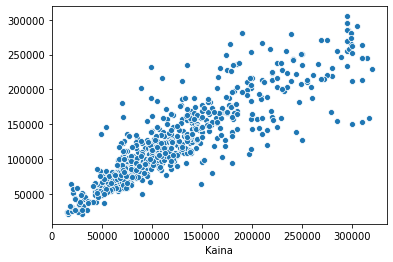

In [16]:
model= grid_search.best_estimator_ # tinkamiausio modelio pasirinkimas: {'max_features': 8, 'n_estimators': 30}
y_pred = model.predict(x_test)
# find mean square error
final_mse = mean_squared_error(y_test, y_pred)
# find root mean square error
final_rmse = np.sqrt(final_mse)

print('Model details:')
print('Accuracy of the model:', model.score(x_test,y_test))
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('MedAE: ', median_absolute_error(y_test, y_pred))
print('R^2: ', r2_score(y_test, y_pred))
print('Mean Squared Error: ', mean_squared_error(y_test, y_pred))

sns.scatterplot(y_test,y_pred)

In [0]:
from sklearn.externals import joblib
joblib.dump(model, 'form_model.pkl')

['model.pkl']